In [2]:
import pandas as pd

In [3]:
print (f'pandas version {pd.__version__}')

pandas version 0.25.3


In [4]:
df = pd.read_csv('../data/data_frame_metrics_logit_07_may_20_CrVal.csv')
df1 = pd.read_csv('../data/data_frame_metrics_adaboost_07_may_20_CrVal_unbalanced.csv')

In [5]:
PDB_BM5 = [
'1EXB','1JTD','1M27','1RKE','2A1A','2GAF','2GTP','2VXT','2W9E',
'2X9A','2YVJ','3A4S','3AAA','BAAD','3AAD','3BIW','3BX7',
'3DAW','3EO1','3EOA','3F1P','3FN1','3G6D','3H11',
'3H2V','3HI6','3HMX','3K75','3L5W','3L89','3LVK','3MXW',
'BP57','CP57','3P57','3PC8','3R9A','3RVW','3S9D','3SZK',
'3V6Z','3VLB','4DN4','4FQI','4FZA','4G6J','4G6M','4GAM',
'4GXU','4H03','4HX3','4IZ7','4JCV','4LW4','4M76'
]

In [6]:
df[df['PDB_idx'].isin(PDB_BM5)].shape

(42, 10)

In [7]:
len(PDB_BM5)

55

In [8]:
x = df1.mean()

In [9]:
y = df.mean()

In [10]:
pd.concat([x,y],axis=1)

,0,1
Accuracy,0.900682,0.762724
MCC,0.408098,0.538891
Testing_size,207.265957,195.255319
Precision bad,0.991332,0.769291
Recall bad,0.898670,0.909249
Precision good,0.338852,0.732085
Recall good,0.639386,0.616198


In [11]:
df.columns

Index(['Accuracy', 'MCC', 'Class', 'Classifier', 'PDB_idx', 'Testing_size',
       'Precision bad', 'Recall bad', 'Precision good', 'Recall good'],
      dtype='object')

In [12]:
classifier = ['logit','perceptron','adaboost','RandomForest']

In [13]:
df_temp = pd.DataFrame()
for m in classifier: 
#     df = pd.read_csv(f'../data/data_frame_metrics_{m}_07_may_20_CrVal_unbalanced.csv')
    df = pd.read_csv(f'../data/data_frame_metrics_{m}_07_may_20_CrVal.csv')
    df[df['PDB_idx'].isin(PDB_BM5)]
    x = df.mean()
    df_temp = pd.concat([df_temp,x],axis=1)
    

/Users/barradd/anaconda2/envs/snorkel_env_2/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [14]:
df_temp.columns = classifier

In [15]:
df_temp

,logit,perceptron,adaboost,RandomForest
Accuracy,0.762724,0.732135,0.776644,0.759019
MCC,0.538891,0.487367,0.559918,0.530028
Precision bad,0.769291,0.723189,0.792856,0.763426
Precision good,0.732085,0.754482,0.726700,0.744353
Recall bad,0.909249,0.927160,0.894248,0.897166
Recall good,0.616198,0.537110,0.659039,0.620871
Testing_size,195.255319,195.255319,195.255319,195.255319


In [16]:
import sys ,os 
# import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from math import pi

# %matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
# sns.set_style("whitegrid")
sns.set(font_scale=1.5,style='whitegrid',context="paper")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [17]:
df_temp.loc["Accuracy"]["logit"]

0.7627235400652416

In [18]:
Accuracy = []
Recall_cor = []
Recall_inc =[]
Precision_cor = []
Precision_inc = []
MCC = []
for cla in classifier : 
    a = df_temp.loc["Accuracy"][cla]
    m = df_temp.loc["MCC"][cla]
    pb = df_temp.loc["Precision bad"][cla]
    pg = df_temp.loc["Precision good"][cla]
    rb = df_temp.loc["Recall bad"][cla]
    rg = df_temp.loc["Recall good"][cla]
    Accuracy.append(a)
    Recall_cor.append(rg)
    Recall_inc.append(rb)
    Precision_cor.append(pg)
    Precision_inc.append(pb)
    MCC.append(m)

In [19]:
# Set data
df = pd.DataFrame({
    'group': ['Logit','NN','ADA','RF'],
# 'group': ['Logit','RF','ADA','SVM','NN'],
#     ['logit','perceptron','adaboost','RandomForest']
'Accuracy':Accuracy,
'Recall cor':Recall_cor ,
'Recall inc': Recall_inc,
'Precision cor': Precision_cor,
'Precision inc': Precision_inc,
'MCC': MCC

})
df2 = df[['Accuracy','Recall cor','Recall inc','Precision cor','Precision inc','MCC']].T

In [20]:
df

,group,Accuracy,Recall cor,Recall inc,Precision cor,Precision inc,MCC
0,Logit,0.7627,0.6162,0.9092,0.7321,0.7693,0.5389
1,NN,0.7321,0.5371,0.9272,0.7545,0.7232,0.4874
2,ADA,0.7766,0.6590,0.8942,0.7267,0.7929,0.5599
3,RF,0.7590,0.6209,0.8972,0.7444,0.7634,0.5300


In [21]:
## source code ##
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/ 

# ------- PART 1: Define a function that do a plot for one line of the dataset!

def make_spider( data,row, title, color,i ):

    # number of variable
#     categories=list(df)[1:]
    #categories = df.columns.drop("group").values.tolist()
    categories = data["group"].values.tolist() ### original line 
#     print (categories)
#     categories = ['Logit', 'RF', 'ADA', 'SVM', 'NN']
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,3,i+1, polar=True )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
   # plt.ylim(0,40)
    plt.ylim(0,1)

    # Ind1
#     values=df.loc[row].drop('group').values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
#     ax.fill(angles, values, color=color, alpha=0.4)

#     print (data)
    df2 = data[['Accuracy','Recall cor','Recall inc','Precision cor','Precision inc','MCC']].T
#     print (df2.loc["Accuracy"])

    # print (df2.iloc['Accuracy'])
    # values=df.loc[0].drop('group').values.flatten().tolist()
    values=df2.loc[row].values.flatten().tolist()

    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)



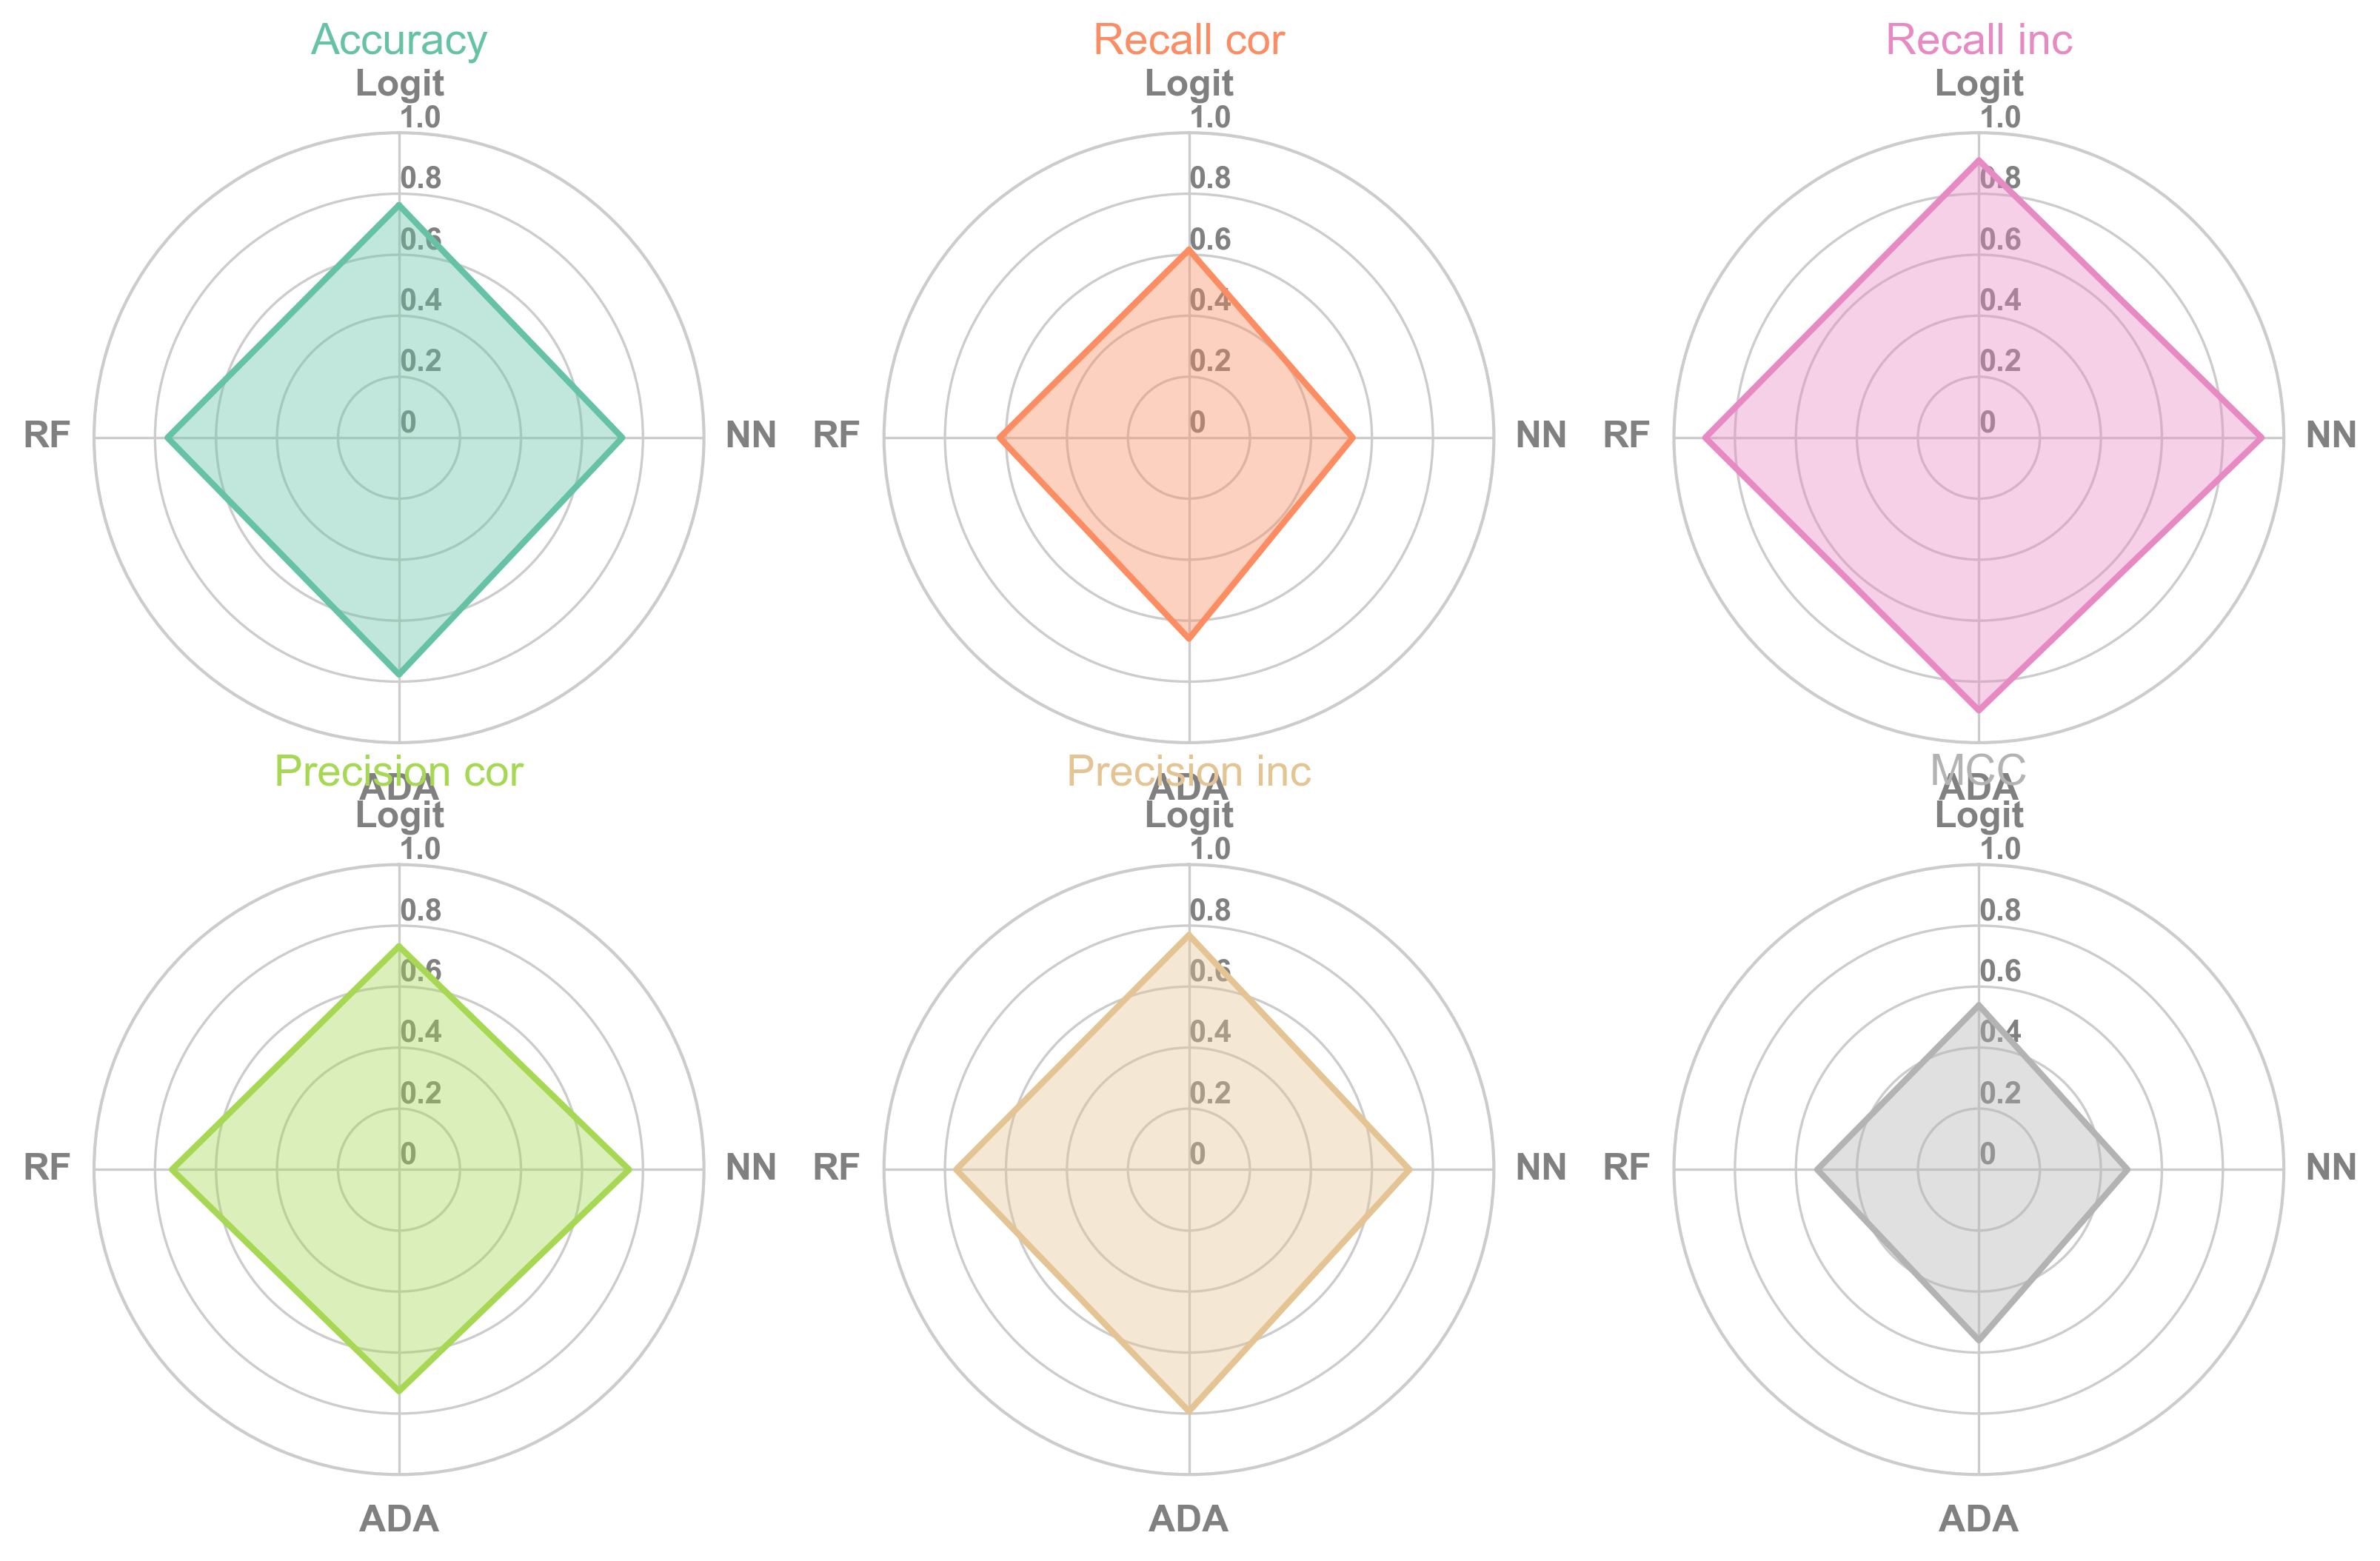

In [22]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=300
#plt.figure(figsize=(3000/my_dpi, 3000/my_dpi), dpi=my_dpi)
plt.figure(figsize=(13, 8), dpi=my_dpi)
plt.tight_layout()
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df2.index))

# # Loop to plot
# for row in range(0, len(df.index)):
#     make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))
    
for i,row in enumerate(df2.index):
#     print (i,row)
    make_spider( data=df,row=row, title=row, color=my_palette(i),i=i)
# plt.savefig("RadarPlot_metrics_ccharppi_05_september_19_ML.png",dpi=300,format="png")
# plt.savefig("RadarPlot_metrics_ccharppi_08_sep_19_only_training_ML.png",dpi=300,format="png")

In [23]:
metrics_only = pd.DataFrame()
for m in ['logit','svc','RandomForest','adaboost','perceptron']:
    print (f"++++++++++++++++ {m} ++++++++++++++++++++")
    
    cv_metrics_logit = pd.read_csv(f"../data/cross_validation_data_frames/dataframe_{m}_cv_metrics.csv")
    cv_metrics_logit.rename(columns={'Unnamed: 0' :'Metric'},inplace=True)
    
    cv_metrics_logit.set_index('Metric',inplace=True)
    cv_metrics_logit = cv_metrics_logit.T
#     print (cv_metrics_logit["mean"])
    metrics_only = pd.concat([metrics_only,cv_metrics_logit["mean"]],axis=1)
#     metrics_only.join(cv_metrics_logit,on='Metric',rsuffix=f'_{m}')
metrics_only.columns =['Logit','SVM','RandomForest','Adaboost','Perceptron']
metrics_only = metrics_only.T
metrics_only.columns = ['Accuracy','Recall inc','Recall cor','Precision inc','Precision cor','F1 inc','F1 cor','MCC']
metrics_only = metrics_only.T

++++++++++++++++ logit ++++++++++++++++++++
++++++++++++++++ svc ++++++++++++++++++++
++++++++++++++++ RandomForest ++++++++++++++++++++
++++++++++++++++ adaboost ++++++++++++++++++++
++++++++++++++++ perceptron ++++++++++++++++++++


/Users/barradd/anaconda2/envs/snorkel_env_2/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


<AxesSubplot:>

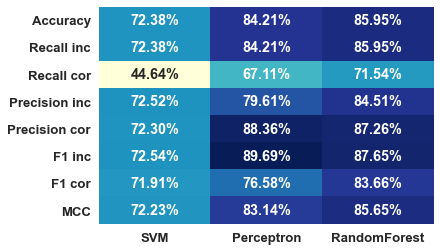

In [24]:

sns.heatmap(metrics_only[['SVM','Perceptron','RandomForest']]#,'Logit','Adaboost']]
            ,annot=True,cmap="YlGnBu",fmt=".2%",cbar=False)

In [25]:
metrics_only = metrics_only[['SVM','Perceptron','RandomForest']].T

In [26]:
metrics_only["group"] = metrics_only.index

In [27]:
metrics_only[['group','Accuracy','Recall cor','Recall inc','Precision cor','Precision inc','MCC']]

,group,Accuracy,Recall cor,Recall inc,Precision cor,Precision inc,MCC
SVM,SVM,0.7238,0.4464,0.7238,0.7230,0.7252,0.7223
Perceptron,Perceptron,0.8421,0.6711,0.8421,0.8836,0.7961,0.8314
RandomForest,RandomForest,0.8595,0.7154,0.8595,0.8726,0.8451,0.8565


0 Accuracy
1 Recall cor
2 Recall inc
3 Precision cor
4 Precision inc
5 MCC


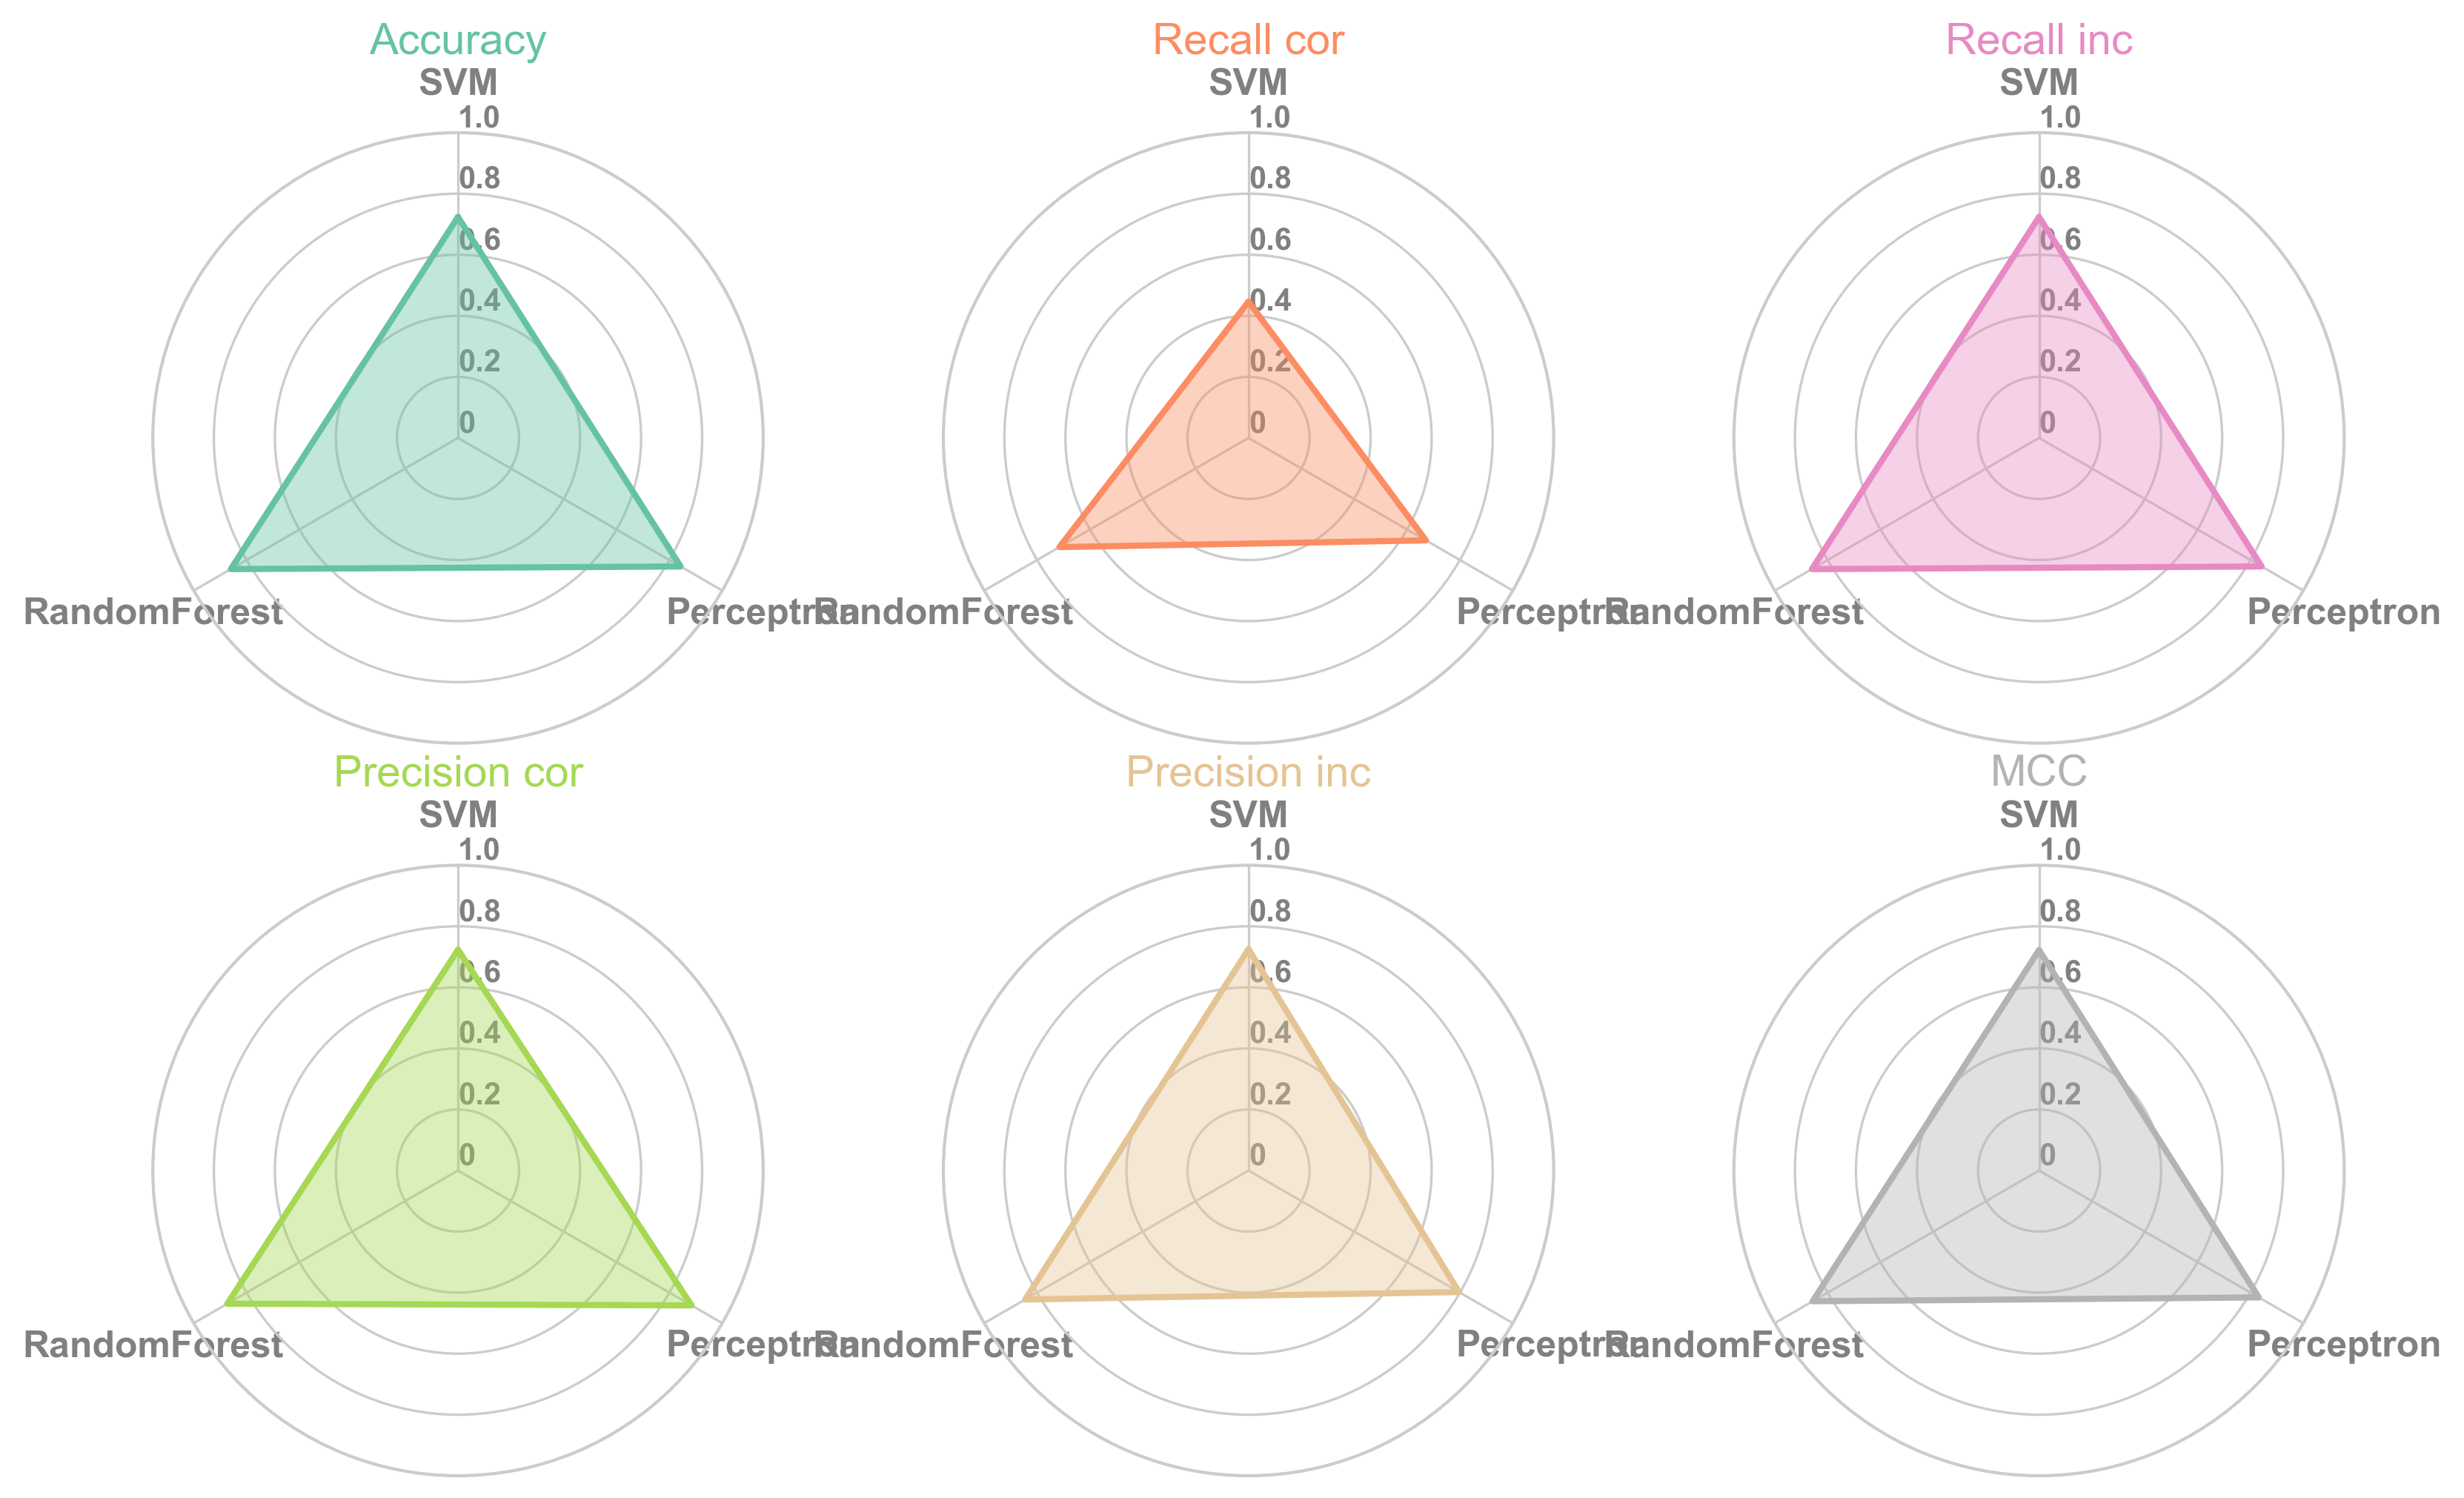

In [28]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=300
#plt.figure(figsize=(3000/my_dpi, 3000/my_dpi), dpi=my_dpi)
plt.figure(figsize=(13, 8), dpi=my_dpi)
plt.tight_layout()
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df2.index))

# # Loop to plot
# for row in range(0, len(df.index)):
#     make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))
    
for i,row in enumerate(['Accuracy','Recall cor','Recall inc','Precision cor','Precision inc','MCC']):
    print (i,row)
    make_spider( data=metrics_only[['group','Accuracy','Recall cor','Recall inc','Precision cor','Precision inc','MCC']] ,row=row, title=row, color=my_palette(i),i=i)
# plt.savefig("RadarPlot_metrics_ccharppi_05_september_19_ML.png",dpi=300,format="png")
# plt.savefig("RadarPlot_metrics_ccharppi_08_sep_19_only_training_ML.png",dpi=300,format="png")

In [29]:
metrics_only.drop("group",inplace=True,axis=1)

In [30]:
g = metrics_only.columns
metrics_only = metrics_only.T
metrics_only["group"] = g

In [31]:
metrics_only = metrics_only.T

In [32]:
metrics_only.T

,SVM,Perceptron,RandomForest,group
Accuracy,0.7238,0.8421,0.8595,Accuracy
Recall inc,0.7238,0.8421,0.8595,Recall inc
Recall cor,0.4464,0.6711,0.7154,Recall cor
Precision inc,0.7252,0.7961,0.8451,Precision inc
Precision cor,0.7230,0.8836,0.8726,Precision cor
F1 inc,0.7254,0.8969,0.8765,F1 inc
F1 cor,0.7191,0.7658,0.8366,F1 cor
MCC,0.7223,0.8314,0.8565,MCC


In [33]:
## source code ##
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/ 

# ------- PART 1: Define a function that do a plot for one line of the dataset!

def make_spider( data,row, title, color,i ):

    # number of variable
#     categories=list(df)[1:]
    #categories = df.columns.drop("group").values.tolist()
    categories = data["group"].values.tolist() ### original line 
#     print (categories)
#     categories = ['Logit', 'RF', 'ADA', 'SVM', 'NN']
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,3,i+1, polar=True )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
   # plt.ylim(0,40)
    plt.ylim(0,1)

    # Ind1
#     values=df.loc[row].drop('group').values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
#     ax.fill(angles, values, color=color, alpha=0.4)

#     print (data)
#     df2 = data[['Accuracy','Recall cor','Recall inc','Precision cor','Precision inc','MCC']].T
    df2 = data[["group","SVM","Perceptron","RandomForest"]].T
#     print (df2.T.loc["SVM"])

    # print (df2.iloc['Accuracy'])
    # values=df.loc[0].drop('group').values.flatten().tolist()
    values=df2.loc[row].values.flatten().tolist()

    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)


0 SVM
1 Perceptron
2 RandomForest


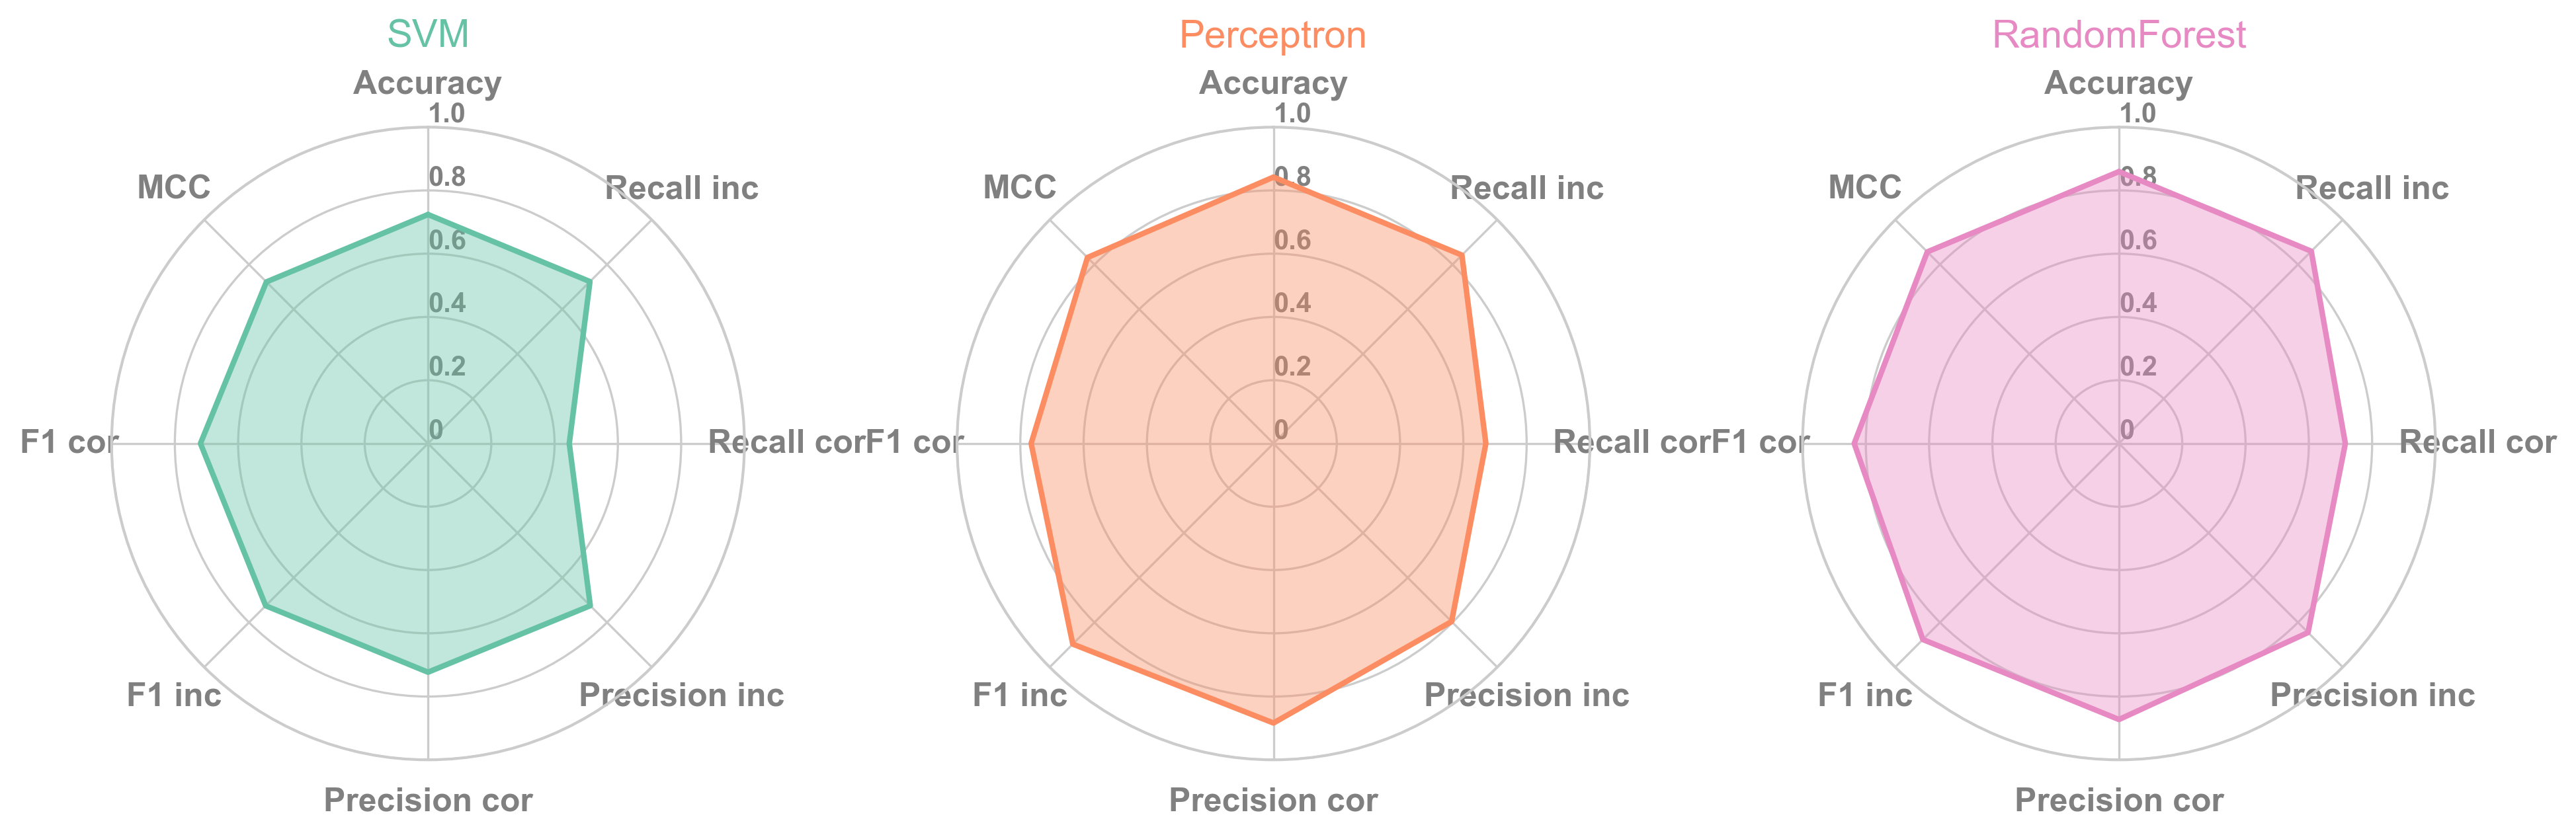

In [34]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=300
#plt.figure(figsize=(3000/my_dpi, 3000/my_dpi), dpi=my_dpi)
plt.figure(figsize=(13, 8), dpi=my_dpi)
plt.tight_layout()
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df2.index))

# # Loop to plot
# for row in range(0, len(df.index)):
#     make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))
    
for i,row in enumerate(["SVM","Perceptron","RandomForest"]):
    print (i,row)
    make_spider( data=metrics_only.T[["group","SVM","Perceptron","RandomForest"]] ,row=row, title=row, color=my_palette(i),i=i)
# plt.savefig("RadarPlot_metrics_ccharppi_05_september_19_ML.png",dpi=300,format="png")
# plt.savefig("RadarPlot_metrics_ccharppi_08_sep_19_only_training_ML.png",dpi=300,format="png")
plt.tight_layout()
plt.savefig("../figures/RadarPlot_metrics_ccharppi_june_10_2020_v2.png",dpi=300,transparent=True,format="png")

In [35]:
# metrics_only[["group","SVM","Perceptron","RandomForest"]].T.loc["SVM"].values.flatten().tolist()

In [36]:

metrics_only

,Accuracy,Recall inc,Recall cor,Precision inc,Precision cor,F1 inc,F1 cor,MCC
SVM,0.7238,0.7238,0.4464,0.7252,0.7230,0.7254,0.7191,0.7223
Perceptron,0.8421,0.8421,0.6711,0.7961,0.8836,0.8969,0.7658,0.8314
RandomForest,0.8595,0.8595,0.7154,0.8451,0.8726,0.8765,0.8366,0.8565
group,Accuracy,Recall inc,Recall cor,Precision inc,Precision cor,F1 inc,F1 cor,MCC


r SVM
g Perceptron
b RandomForest


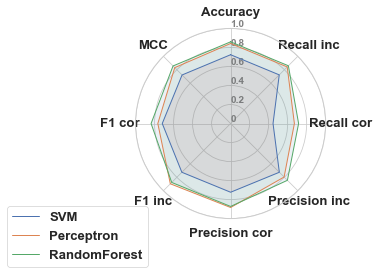

In [37]:
# ------- PART 1: Create background
 
# number of variable
# categories=list(df)[1:]
categories = metrics_only.T["group"].values.tolist() ### original line 

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
plt.ylim(0,1)


# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
 
#------ PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    print (i,row)
    values = metrics_only.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row)
    ax.fill(angles, values,i , alpha=0.1)
#     make_spider( data=metrics_only[["group","SVM","Perceptron","RandomForest"]] ,row=row, title=row, color=my_palette(i),i=i)
# plt.savefig("RadarPlot_metrics_ccharppi_05_september_19_ML.png",dpi=300,format="png")
# plt.savefig("RadarPlot_metrics_ccharppi_08_sep_19_only_training_ML.png",dpi=300,format="png")


# # Ind1
# values=df.loc[0].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
# ax.fill(angles, values, 'b', alpha=0.1)
 
# # Ind2
# values=df.loc[1].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
# ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.savefig("../figures/RadarPlot_metrics_ccharppi_june_10_2020.png",dpi=300,transparent=True,format="png")

0 SVM
1 Perceptron
2 RandomForest


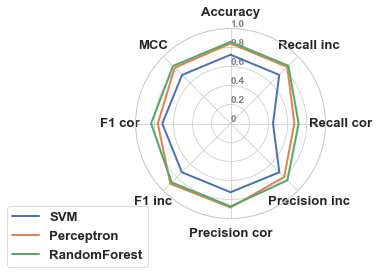

In [38]:
# ------- PART 1: Create background
 
# number of variable
# categories=list(df)[1:]
categories = metrics_only.T["group"].values.tolist() ### original line 

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
plt.ylim(0,1)


# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
 
#------ PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

for i,row in enumerate(["SVM","Perceptron","RandomForest"]):
    print (i,row)
    values = metrics_only.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row)
#     ax.fill(angles, values,my_palette(i) , alpha=0.1)
#     make_spider( data=metrics_only[["group","SVM","Perceptron","RandomForest"]] ,row=row, title=row, color=my_palette(i),i=i)
# plt.savefig("RadarPlot_metrics_ccharppi_05_september_19_ML.png",dpi=300,format="png")
# plt.savefig("RadarPlot_metrics_ccharppi_08_sep_19_only_training_ML.png",dpi=300,format="png")


# # Ind1
# values=df.loc[0].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
# ax.fill(angles, values, 'b', alpha=0.1)
 
# # Ind2
# values=df.loc[1].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
# ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()

In [39]:
df

,group,Accuracy,Recall cor,Recall inc,Precision cor,Precision inc,MCC
0,Logit,0.7627,0.6162,0.9092,0.7321,0.7693,0.5389
1,NN,0.7321,0.5371,0.9272,0.7545,0.7232,0.4874
2,ADA,0.7766,0.6590,0.8942,0.7267,0.7929,0.5599
3,RF,0.7590,0.6209,0.8972,0.7444,0.7634,0.5300


In [40]:
df.loc[1].drop('group').values.flatten().tolist()

[0.7321352045710332,
 0.5371100882502338,
 0.9271603208918326,
 0.754482311779927,
 0.7231892464298774,
 0.48736713880787375]

In [41]:
values=df.loc[0].drop('group').values.flatten().tolist()
values

[0.7627235400652416,
 0.6161984915934015,
 0.9092485885370819,
 0.7320846778358594,
 0.7692905523240391,
 0.5388911038056852]

In [42]:

values += values[:1]

In [43]:
values

[0.7627235400652416,
 0.6161984915934015,
 0.9092485885370819,
 0.7320846778358594,
 0.7692905523240391,
 0.5388911038056852,
 0.7627235400652416]

In [45]:
# values = metrics_only.T.loc["SVM"].values.flatten().tolist()

In [ ]:
# values += values[:1]

In [46]:
# values

In [81]:
## source code ##
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
def plot_radar(dataframe,title):
  # ------- PART 1: Create background
  categories = dataframe.T.index.to_list()
  # number of variable
  # categories=list(df)[1:]
  #categories = metrics_only.T["group"].values.tolist() ### original line 

  N = len(categories)
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot
  ax = plt.subplot(111, polar=True)
  
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
  
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories)
  
  # Draw ylabels
  ax.set_rlabel_position(0)

  plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
  plt.ylim(0,1)
  # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
  # plt.ylim(0.4,1)

  
  #------ PART 2: Add plots
  
  # Plot each individual = each line of the data
  # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

  #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
  for i,row in zip(['r','g','b'],dataframe.index.to_list()):
      print (i,row)
      values = dataframe.loc[row].values.flatten().tolist()
      values += values[:1]
      ax.plot(angles, values, linewidth=2, linestyle='solid', label=row)
      # ax.fill(angles, values,i , alpha=0.1)


  
  # Add legend
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  plt.tight_layout()
#   plt.show()
#   plt.savefig(f"../figures/{title}.svg",dpi=300,transparent=True,format="svg")
  plt.savefig(f"../figures/{title}.svg",format="svg")

In [66]:
df_metrics_unbalanced =pd.read_csv('../data/dataframe_metrics_shakel_unbalanced.csv')
df_metrics_balanced =pd.read_csv('../data/dataframe_metrics_shakel_balanced.csv')

In [67]:
df_metrics_unbalanced.set_index(" ",inplace=True)

r RFC 
g PRC 
b SVM 


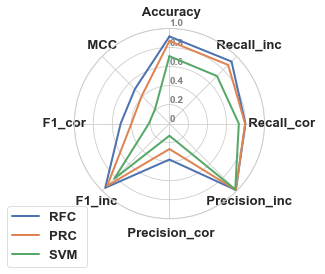

In [82]:
plot_radar(df_metrics_unbalanced,"Radar_plot_metrics_unbalanced")

r RFC 
g PRC 
b SVM 


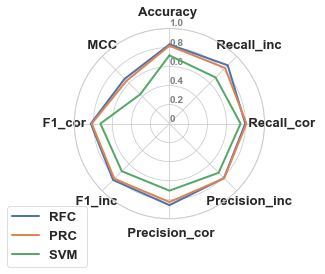

In [83]:
plot_radar(df_metrics_balanced,"Radar_plot_metrics_balanced")

In [84]:
df_metrics_balanced

,Accuracy,Recall_inc,Recall_cor,Precision_inc,Precision_cor,F1_inc,F1_cor,MCC
RFC,0.8321,0.8669,0.7973,0.8105,0.8569,0.8377,0.8260,0.6658
PRC,0.8184,0.8274,0.8094,0.8128,0.8242,0.8200,0.8168,0.6369
SVM,0.7170,0.6863,0.7477,0.7312,0.7045,0.7080,0.7254,0.4348


In [ ]:
df_CV_10k = pd.read_csv("../data/dataframe_metrics_shakel_metrics_crossvalidation.csv")
df_CV_10k = df_CV_10k[['BM5 bal  ',' 10kCV Bal ',' BM5 unb ','10kCV Unb ']]
df_CV_10k["Metrics"] = ['Acc', 'R_inc', 'R_cor', 'P_inc','P_cor', 'F1_inc', 'F1_cor', 'MCC']
df_CV_10k = df_CV_10k.set_index("Metrics")

In [ ]:
df_CV_10kT = df_CV_10k.T

In [ ]:
from math import pi
## source code ##
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
def plot_radar(dataframe,title):
  # ------- PART 1: Create background
  categories = dataframe.T.index.to_list()
  # number of variable
  # categories=list(df)[1:]
  #categories = metrics_only.T["group"].values.tolist() ### original line 

  N = len(categories)
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot
  ax = plt.subplot(111, polar=True)
  
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
  
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories)
  
  # Draw ylabels
  ax.set_rlabel_position(0)

  plt.yticks([0.6,0.7,0.8,0.9,1.0], ["0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
  plt.ylim(0.5,1)
  # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
  # plt.ylim(0.4,1)

  
  #------ PART 2: Add plots
  
  # Plot each individual = each line of the data
  # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

  #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
  for i,row in zip(['b','r','g','w'],dataframe.index.to_list()):
#   for row in dataframe.index.to_list():
      print (row)
      values = dataframe.loc[row].values.flatten().tolist()
      print (values)
      values += values[:1]
      ax.plot(angles, values ,linewidth=1, label=row)## color=i,linestyle='dotted'
      # ax.fill(angles, values,i , alpha=0.1)


  
  # Add legend
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  plt.tight_layout()
#   plt.show()
#   plt.savefig(f"../figures/{title}.svg",dpi=300,transparent=True,format="svg")
#   plt.savefig(f"../figures/{title}.eps",format="eps")

In [ ]:
plot_radar(df_CV_10kT,"CV_performance")